<a href="https://colab.research.google.com/github/IvanFP26/MachineLearning/blob/main/Week2/RegressionDataPublic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Nama : Ivan Fernanda Prayoga
#NIM : 1103204035
#Regression Public

In [5]:
# Import Library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# Memuat data dari file CSV
data = pd.read_csv('/content/InternetUser.csv')

In [7]:
# Mengganti nilai NaN di kolom 'TingkatPerkotaan' dan 'PenggunaInternet' dengan rata-rata kolom tersebut
data['TingkatPerkotaan'].fillna((data['TingkatPerkotaan'].mean()), inplace=True)
data['PenggunaInternet'].fillna((data['PenggunaInternet'].mean()), inplace=True)

In [8]:
# Menampilkan informasi dasar tentang DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Negara              213 non-null    object 
 1   PendapatanPerOrang  213 non-null    float64
 2   PenggunaInternet    213 non-null    float64
 3   TingkatPerkotaan    213 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB
None


In [9]:
# Menampilkan statistik deskriptif
print(data.describe())

       PendapatanPerOrang  PenggunaInternet  TingkatPerkotaan
count          213.000000        213.000000        213.000000
mean          7797.105890         32.119631         54.104131
std          13738.698119         28.437108         26.203836
min              0.000000          0.000000          0.000000
25%            456.385712          6.497924         33.960000
50%           2161.546510         26.740025         56.700000
75%           8445.526689         51.958038         73.500000
max         105147.437700         95.638113        100.000000


In [10]:
# Menampilkan matriks korelasi
print(data.corr())

                    PendapatanPerOrang  PenggunaInternet  TingkatPerkotaan
PendapatanPerOrang            1.000000          0.574396          0.456609
PenggunaInternet              0.574396          1.000000          0.541542
TingkatPerkotaan              0.456609          0.541542          1.000000


<ipython-input-10-97b473436f30>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


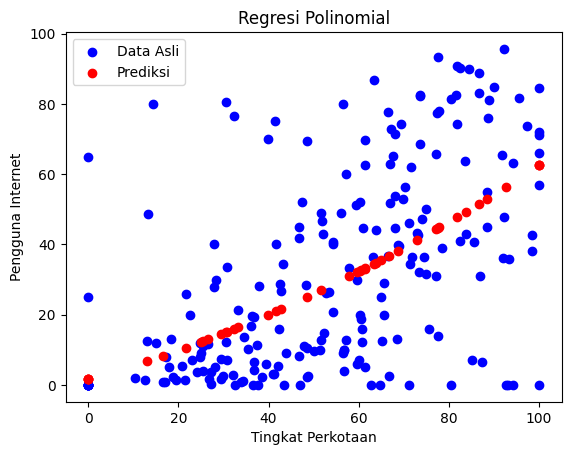

In [11]:
# Memilih kolom yang akan digunakan sebagai fitur dan target
X = data['TingkatPerkotaan'].values.reshape(-1, 1)
y = data['PenggunaInternet'].values

# Membagi data menjadi data pelatihan dan pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat objek PolynomialFeatures
degree = 2 # or any other degree you want to use for the polynomial regression.
poly_reg = PolynomialFeatures(degree=degree)

# Mengubah fitur input (X) menjadi fitur polinomial
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)

# Membuat model regresi linear dengan fitur polinomial
model = LinearRegression()
model.fit(X_poly_train,y_train)

# Membuat prediksi berdasarkan model
y_pred=model.predict(X_poly_test)

# Plot hasil regresi polinomial
plt.scatter(X,y,color='blue',label='Data Asli')
plt.scatter(X_test,y_pred,color='red',label='Prediksi')
plt.xlabel('Tingkat Perkotaan')
plt.ylabel('Pengguna Internet')
plt.title('Regresi Polinomial')
plt.legend()
plt.show()